Import Libraries

In [1]:
import pandas as pd
import numpy as ns
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [2]:
df = pd.read_csv(r"E:\Data Science\banknifty_data.csv");

In [3]:
df.head

<bound method NDFrame.head of       Unnamed: 0                       time        open        high  \
0              0  2000-01-03 09:15:00+05:30   1054.8101   1054.8101   
1              1  2000-01-04 09:15:00+05:30   1092.0800   1092.0800   
2              2  2000-01-05 09:15:00+05:30   1055.9900   1055.9900   
3              3  2000-01-06 09:15:00+05:30   1086.6700   1086.6700   
4              4  2000-01-07 09:15:00+05:30   1126.9900   1126.9900   
...          ...                        ...         ...         ...   
5564        5564  2022-06-13 09:15:00+05:30  33728.6480  33774.0510   
5565        5565  2022-06-14 09:15:00+05:30  33180.6020  33618.1480   
5566        5566  2022-06-15 09:15:00+05:30  33317.8010  33554.5510   
5567        5567  2022-06-16 09:15:00+05:30  33648.8010  33756.5000   
5568        5568  2022-06-17 09:15:00+05:30  32393.4490  32889.8010   

             low       close  weekday  range_HL  range_OC  type  
0      1054.8101   1054.8101        0     0.000    

In [4]:
df.columns

Index(['Unnamed: 0', 'time', 'open', 'high', 'low', 'close', 'weekday',
       'range_HL', 'range_OC', 'type'],
      dtype='object')

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 10 columns):
Unnamed: 0    5569 non-null int64
time          5569 non-null object
open          5569 non-null float64
high          5569 non-null float64
low           5569 non-null float64
close         5569 non-null float64
weekday       5569 non-null int64
range_HL      5569 non-null float64
range_OC      5569 non-null float64
type          5569 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 435.2+ KB


There are no null data in banknifty data


In [6]:
#convert time to pd time
df["time"] = pd.to_datetime(df["time"])

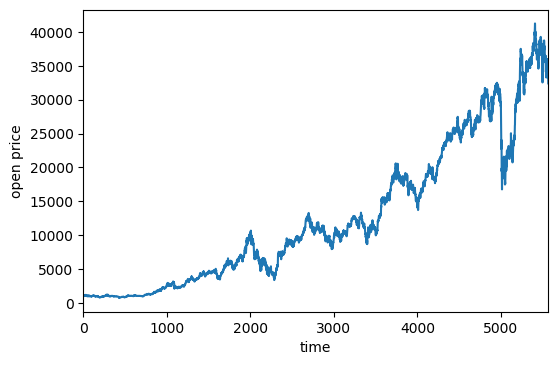

In [7]:
fig1, ax = plt.subplots(1,1,dpi=100)
df.open.plot(ax=ax);
ax.set_xlabel('time');
ax.set_ylabel('open price');

Count plot

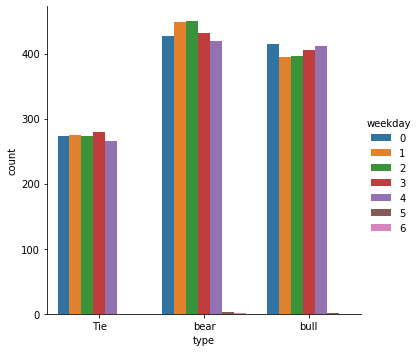

In [8]:
sns.catplot(x = "type", hue = "weekday", kind = "count", data = df);

Whats strange is we find somedays, market has been open on sunday and saturday. May be these days fall on the evening on the day of Diwali, if Diwali falls on Saturday or Sunday. This is called Muharat trading. Lets ignore this data and hence lets drop it from further analysis.

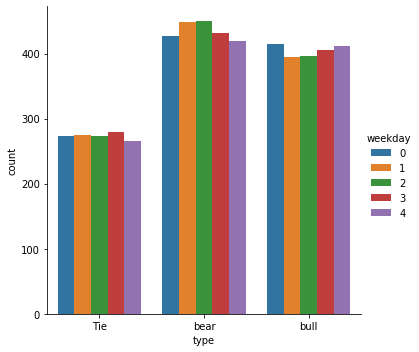

In [9]:
df = df.drop(df[df.weekday >=5].index); # drop Muharat trading days.
sns.catplot(x ="type", hue ="weekday",kind ="count", data = df);

Violin plot

(-100, 600)

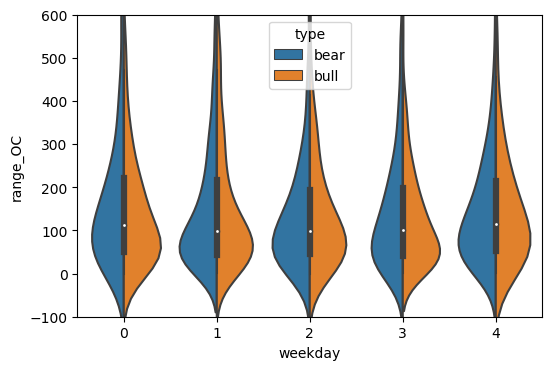

In [10]:
fig1, ax = plt.subplots(1,1,dpi=100)
sns.violinplot(x ="weekday", y ="range_OC", hue ="type",data = df[(df.type=='bull') | (df.type=='bear')], split = True,ax=ax);
ax.set_ylim([-100,600])

Violin Plot look so symmetrical that bull and bear have been on equal basis. So coin toss example during risk-reward concept of stock market classes is after all a very valid example.

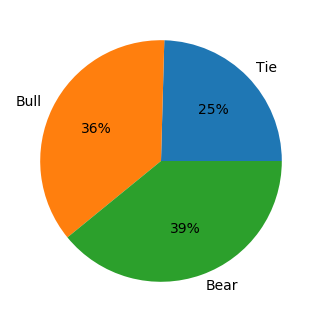

In [11]:
fig1, ax = plt.subplots(1,1,dpi=100);

Tie  = len(df[df.type=='Tie']);
Bull = len(df[df.type=='bull']);
Bear = len(df[df.type=='bear']);

ax.pie([Tie,Bull,Bear],labels=['Tie','Bull','Bear'],autopct='%1.0f%%');

Most of the time, market has been bull or bear with 25% of doji type markets.

Monthly Sample

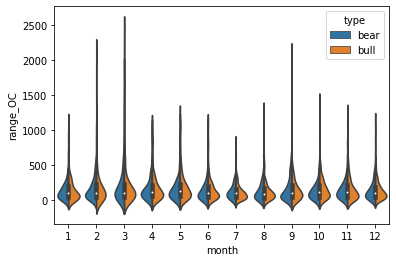

In [13]:
# adding a month column into the dataframe
df["month"] = df["time"].dt.month;
# violin plot on month column
sns.violinplot(x ="month", y ="range_OC", hue ="type",data = df[(df.type=='bull') | (df.type=='bear')], split = True)

On which month Banknifty rallied more than 1000 points ?

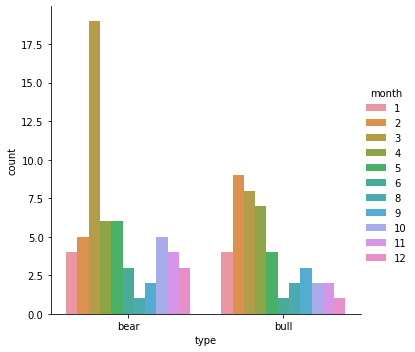

In [14]:
sns.catplot(x ="type", hue ="month",kind ="count", data = df[df.range_HL>1000]);

In general, March month have been historically a more bearish month and February being most bullish.
May, June, July have been resting or napping time for market as seen by above plot.

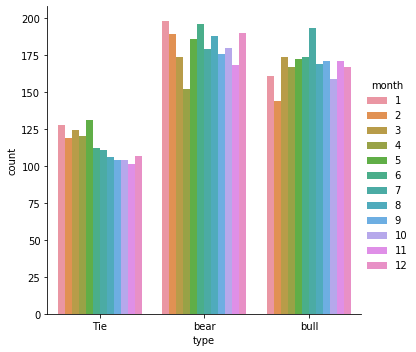

In [15]:
sns.catplot(x ="type", hue ="month",kind ="count", data = df);